In [58]:
import csv
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from collections import deque
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
import csv
import heapq
import time
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import pandas as pd

# 加载数据集
def load_iris_dataset(filename):
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip header if present
        dataset = [list(map(float, row[:-1])) for row in csvreader if row]  # Exclude the label
    return dataset

iris_data=load_iris_dataset('./dataset/iris.data')
iris=np.array(iris_data)


def rangeQuery(X, P, eps):
    distances = euclidean_distances(X[P].reshape(1, -1), X)
    neighbors = set(np.where(distances <= eps)[1].tolist())  # 使用集合存储neighbors
    return neighbors

def dbscan(X, eps, minPts):
    labels = np.full(X.shape[0], -1)
    C = 0
    for P in range(X.shape[0]):
        if labels[P] != -1:
            continue
        neighbors = rangeQuery(X, P, eps)
        if len(neighbors) < minPts:
            labels[P] = -2  # Mark as noise
            continue
        C += 1
        labels[P] = C
        neighbors.remove(P)  # 删除自身，避免后面重复检查
        seeds = neighbors.copy()
        while seeds:
            Pn = seeds.pop()
            if labels[Pn] == -2:
                labels[Pn] = C
            if labels[Pn] == -1:
                labels[Pn] = C
                Pn_neighbors = rangeQuery(X, Pn, eps)
                if len(Pn_neighbors) >= minPts:
                    seeds |= Pn_neighbors  # 使用集合的并集操作添加新的元素
    return labels


# Function to plot pairplot
def plot_pairplot(data, labels):
    # Convert the data to a DataFrame for seaborn compatibility
    df = pd.DataFrame(data, columns=[f'feature{i}' for i in range(data.shape[1])])
    df['label'] = labels
    sns.pairplot(df, hue='label', palette='bright')
    plt.show()



def plot_cluster(labels):
    # 假设 'labels' 是DBSCAN后得到的簇标签数组
    # 'iris' 是原始的数据集数组

    # 获得簇的数量（去除噪声点）
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # 设置不同簇的颜色
    # 注意：如果簇的数量很多，则需要调整此处的颜色列表
    colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
    vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

    # 为每个簇的样本分配颜色
    colored_labels = vectorizer(labels)

    # 创建散点图
    plt.figure(figsize=(12, 9))
    for class_label, plot_color in zip(range(n_clusters_), colors):
        # 基于簇标签过滤数据点
        class_member_mask = (labels == class_label)
        xy = iris[class_member_mask]
        
        # 绘制每个簇的数据点
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c=plot_color, label=f'Cluster {class_label}')
        
    # 绘制噪声点，如果有的话
    if -1 in labels:
        # 获取噪声点
        noise_mask = (labels == -1)
        xy_noise = iris[noise_mask]
        plt.scatter(xy_noise[:, 0], xy_noise[:, 1], s=50, color='k', label='Noise')

    # 添加图例
    plt.legend()

    # 添加各种标签
    plt.title('DBSCAN Clustering')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # 显示图像
    plt.show()




# 只有当标签中存在多于一个簇且不全部为噪声时，轮廓系数才有意义
# 这里检查簇的数量大于1，并且不是所有点都被标记为噪声
labels = dbscan(iris, eps=0.7, minPts=7)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

if n_clusters > 1 and n_noise != len(labels):
    silhouette_avg = silhouette_score(iris, labels)
    print(f"轮廓系数: {silhouette_avg}")
else:
    print("轮廓系数无法计算，需要至少两个簇且不能全部为噪声。")




轮廓系数: 0.53200070992595


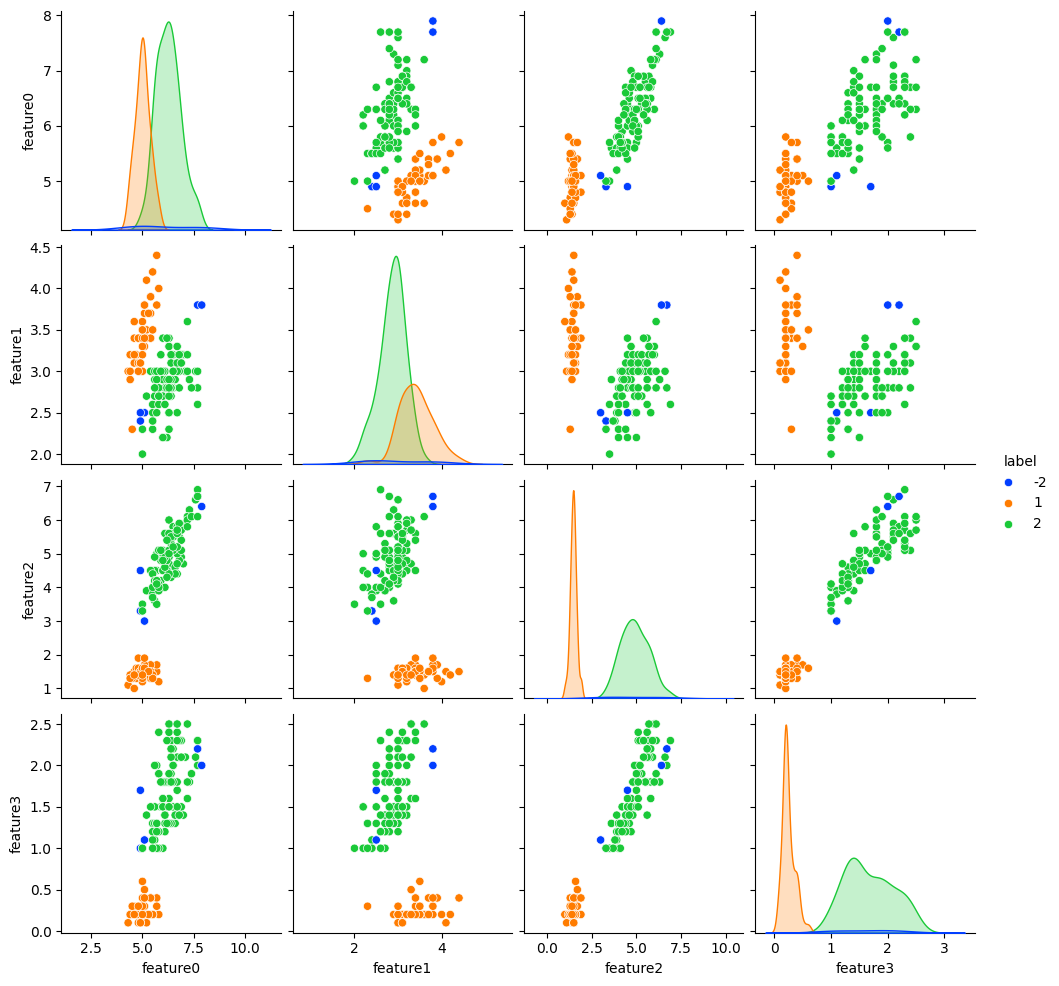

In [56]:
plot_pairplot(iris, labels)

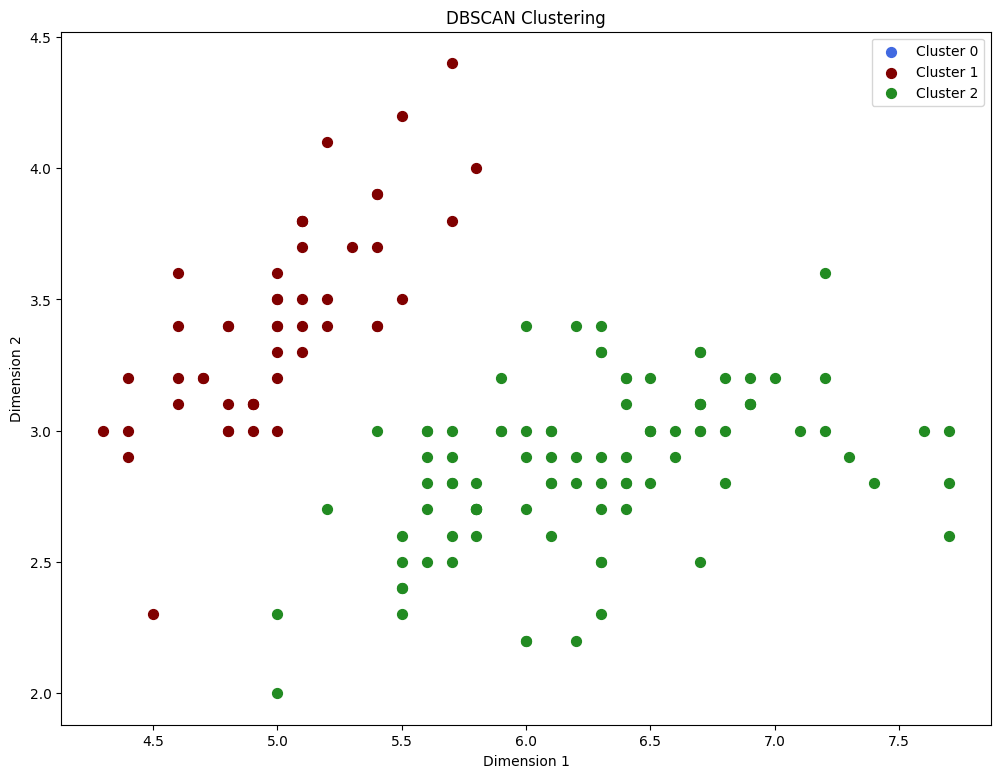

In [57]:
plot_cluster(labels)